In [8]:
import numpy as np

def colorisValid(color, node, graph, nodeColors):
    for ele in graph[node]:
        if nodeColors[ele] == color:
            return False;
    return True

In [89]:
def solve(start_node, graph, nodeColors, colors):
    if start_node == len(graph):
        return True
    elif nodeColors[start_node] == 'N':
        return tryAddingColor(start_node, graph, nodeColors, colors)
    return solve(start_node + 1, graph, nodeColors, colors)

def tryAddingColor(node, graph, nodeColors, colors):
    for col_idx in range(len(colors)):
        color = colors[col_idx]
        if colorisValid(color, node, graph, nodeColors):
            nodeColors[node] = color
            global_colors.append(nodeColors.copy())
            success = solve(node + 1, graph, nodeColors, colors)
            if success:
                return success

            nodeColors[node] = 'N'
            global_colors.append(nodeColors.copy())
        else:
            # color isnt valid, add and remove for viz
            nodeColors[node] = color
            global_colors.append(nodeColors.copy())
            nodeColors[node] = 'N'
            global_colors.append(nodeColors.copy())
    nodeColors[node] = 'N'
    global_colors.append(nodeColors.copy())
    return False

In [106]:
graph = [ [1, 2, 3, 4, 6, 7], [0, 5], [0, 4, 8], [0, 7], [0, 2], [1, 6], [0, 5, 7], [0, 3, 6, 8], [2, 7] ]
colors = ['R', 'G']


nodeColors = ['N' for idx in range(len(graph))]
global_colors = [nodeColors.copy()]

solved = solve(0, graph, nodeColors, colors)
if solved == True:
    print('Found solution')
else:
    print("No Solution")

nodeColors

No Solution


['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

In [107]:
global_colors_works = global_colors.copy()

In [108]:
def get_node_colors_nx(nodeColors):    
    node_col = []
    for col in nodeColors:
        if col == 'R':
            node_col.append('red')
        elif col == 'B':
            node_col.append('blue')
        elif col == 'G':
            node_col.append('green')
        else:
            node_col.append('black')
    return node_col

In [109]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8])
edges = []
for node in range(len(graph)):
    for conn_node in graph[node]:
        e = (node, conn_node)
        edges.append(e)
    
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=1000)  # positions for all nodes


In [110]:
nx.draw(G, pos, with_labels= True, node_color=node_col, node_size=1000, font_color='white')

<IPython.core.display.Javascript object>


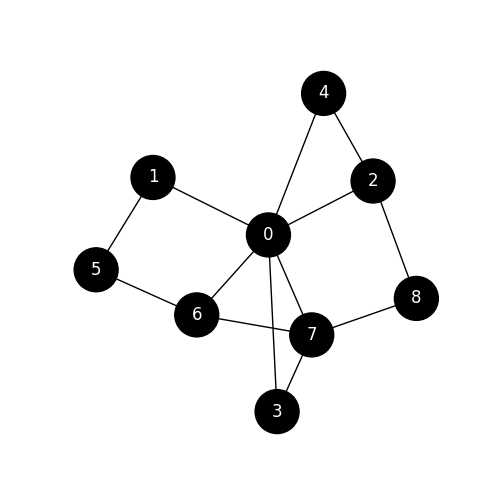

interactive(children=(IntSlider(value=0, description='idx', layout=Layout(width='70%'), max=46), Output()), _d…

<function __main__.update(idx)>

In [114]:
# Plot the demonstrations
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact, Layout
%matplotlib notebook
fig, ax = plt.subplots(1,figsize=(5, 5))
# fig.suptitle("Map Coloring")
ax.set_axis_off()
image_h = nx.draw(G, pos, with_labels= True, node_color=get_node_colors_nx(global_colors[0]), ax=ax, node_size=1000, font_color='white')
plt.savefig('000.jpg')
def update(idx):
    ax.clear()
    image_h = nx.draw(G, pos, with_labels= True, node_color=get_node_colors_nx(global_colors[idx]), ax=ax, node_size=1000, font_color='white')
    plt.savefig(f'{idx:0{3}d}.jpg')
    fig.canvas.draw_idle()
    
slider_i = widgets.IntSlider(min=0, max=len(global_colors), step=1, value=0,
                             layout=Layout(width='70%'))

interact(update, idx=slider_i)